# Import

In [2]:
import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression

import seaborn as sns

import matplotlib.pyplot as plt

# Exploration

In [3]:
url = "https://raw.githubusercontent.com/louiskuhn/IA-P3-Euskadi/main/Projets/Projet%20P5%20-%20IMDB/5000_movies_bis.csv"

df = pd.read_csv(url)

# un premier aperçu
df.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes'],
      dtype='object')

In [5]:
df.shape

(5043, 28)

In [6]:
df.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [7]:
num_unique = df.nunique()
print("Nombre de différences :", num_unique)

Nombre de différences : color                        2
director_name             2398
num_critic_for_reviews     528
duration                   191
director_fb_likes          435
actor_3_fb_likes           906
actor_2_name              3032
actor_1_fb_likes           878
gross                     4224
genres                     914
actor_1_name              2097
movie_title               4917
num_voted_users           4826
cast_total_fb_likes       3978
actor_3_name              3521
facenumber_in_poster        19
plot_keywords             4760
movie_imdb_link           4919
num_user_for_reviews       954
language                    47
country                     65
content_rating              18
budget                     444
title_year                  91
actor_2_fb_likes           917
imdb_score                  78
aspect_ratio                22
movie_fb_likes             876
dtype: int64


In [8]:
# drop des doublons en utilisant les liens uniques du site
print(df.shape)
df.drop_duplicates(subset=['movie_imdb_link'], keep="first", inplace=True)
print(df.shape)


(5043, 28)
(4919, 28)


In [9]:
# transforme les 0 en NA sauf le nombre de visage sur les affiches qui a du sens
cols=df.columns[(df==0).any()].drop('facenumber_in_poster')
df[cols]=df[cols].replace(0, np.nan)

In [10]:
# Drop des colonnes ayant quasi que des valeurs uniques, elles ne contribueront pas à la prédiction.
df.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

In [11]:
# Drop de color, quasi tous les films sont en couleurs
df["color"].value_counts()
df.drop('color',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 5042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           4817 non-null   object 
 1   num_critic_for_reviews  4870 non-null   float64
 2   duration                4904 non-null   float64
 3   director_fb_likes       3938 non-null   float64
 4   actor_3_fb_likes        4807 non-null   float64
 5   actor_2_name            4906 non-null   object 
 6   actor_1_fb_likes        4886 non-null   float64
 7   gross                   4251 non-null   float64
 8   genres                  4919 non-null   object 
 9   actor_1_name            4912 non-null   object 
 10  num_voted_users         4919 non-null   int64  
 11  cast_total_fb_likes     4886 non-null   float64
 12  actor_3_name            4896 non-null   object 
 13  facenumber_in_poster    4906 non-null   float64
 14  plot_keywords           4767 non-null   

In [13]:
df.isnull().sum()

director_name              102
num_critic_for_reviews      49
duration                    15
director_fb_likes          981
actor_3_fb_likes           112
actor_2_name                13
actor_1_fb_likes            33
gross                      668
genres                       0
actor_1_name                 7
num_voted_users              0
cast_total_fb_likes         33
actor_3_name                23
facenumber_in_poster        13
plot_keywords              152
num_user_for_reviews        21
language                    12
country                      5
content_rating             301
budget                     399
title_year                 106
actor_2_fb_likes            68
imdb_score                   0
aspect_ratio               326
movie_fb_likes            2131
dtype: int64

In [14]:
occurrences_par_categorie = df["content_rating"].value_counts()
print(occurrences_par_categorie)

R            2069
PG-13        1411
PG            686
Not Rated     115
G             112
Unrated        59
Approved       54
TV-14          30
TV-MA          18
TV-PG          13
X              12
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64


In [15]:
# On remplace les valeurs manquantes par R, catégorie la plus représentée
df["content_rating"].fillna("R", inplace = True) 

In [16]:
# regrouper les catégories similaires
def replace_rating(row):
    if row['content_rating'] in ['Passed', 'Approved', 'M', 'GP']:
        return 'PG'
    elif row['content_rating'] in ['Not Rated', 'Unrated']:
        return 'UR'
    elif row['content_rating'] == 'X':
        return 'NC-17'
    elif row['content_rating'] == 'TV-14':
        return 'PG-13'
    else:
        return row['content_rating']

df['content_rating']= df.apply(replace_rating, axis=1)
df.content_rating.value_counts()

R        2370
PG-13    1441
PG        760
UR        174
G         112
NC-17      19
TV-MA      18
TV-PG      13
TV-G       10
TV-Y        1
TV-Y7       1
Name: content_rating, dtype: int64

In [17]:
df.dropna(subset=['director_name','actor_2_name','actor_1_name','actor_3_name','language','country','content_rating'], inplace=True)

In [18]:
df.isnull().sum()

director_name                0
num_critic_for_reviews      40
duration                    11
director_fb_likes          867
actor_3_fb_likes            85
actor_2_name                 0
actor_1_fb_likes            22
gross                      556
genres                       0
actor_1_name                 0
num_voted_users              0
cast_total_fb_likes         22
actor_3_name                 0
facenumber_in_poster        13
plot_keywords              135
num_user_for_reviews        15
language                     0
country                      0
content_rating               0
budget                     301
title_year                   2
actor_2_fb_likes            47
imdb_score                   0
aspect_ratio               296
movie_fb_likes            2081
dtype: int64

In [19]:
df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_fb_likes','actor_3_fb_likes',
                         'actor_2_name','actor_1_fb_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews',
                         'language','country','actor_2_fb_likes','plot_keywords'],
                         inplace=True)

In [20]:
df.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_fb_likes            0
actor_3_fb_likes             0
actor_2_name                 0
actor_1_fb_likes             0
gross                      350
genres                       0
actor_1_name                 0
num_voted_users              0
cast_total_fb_likes          0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                     218
title_year                   0
actor_2_fb_likes             0
imdb_score                   0
aspect_ratio               140
movie_fb_likes            1739
dtype: int64

### on peut remplacer les NA des 3 dernières variables par leur médianes

In [21]:
median_values = df.median()

df = df.fillna(median_values)

C:\Users\lacom\AppData\Local\Temp\ipykernel_17612\2262258760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = df.median()


In [22]:
df.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
director_fb_likes         0
actor_3_fb_likes          0
actor_2_name              0
actor_1_fb_likes          0
gross                     0
genres                    0
actor_1_name              0
num_voted_users           0
cast_total_fb_likes       0
actor_3_name              0
facenumber_in_poster      0
plot_keywords             0
num_user_for_reviews      0
language                  0
country                   0
content_rating            0
budget                    0
title_year                0
actor_2_fb_likes          0
imdb_score                0
aspect_ratio              0
movie_fb_likes            0
dtype: int64

### Il n'y a plus de valeurs manquantes

In [23]:
df.shape

(3765, 25)

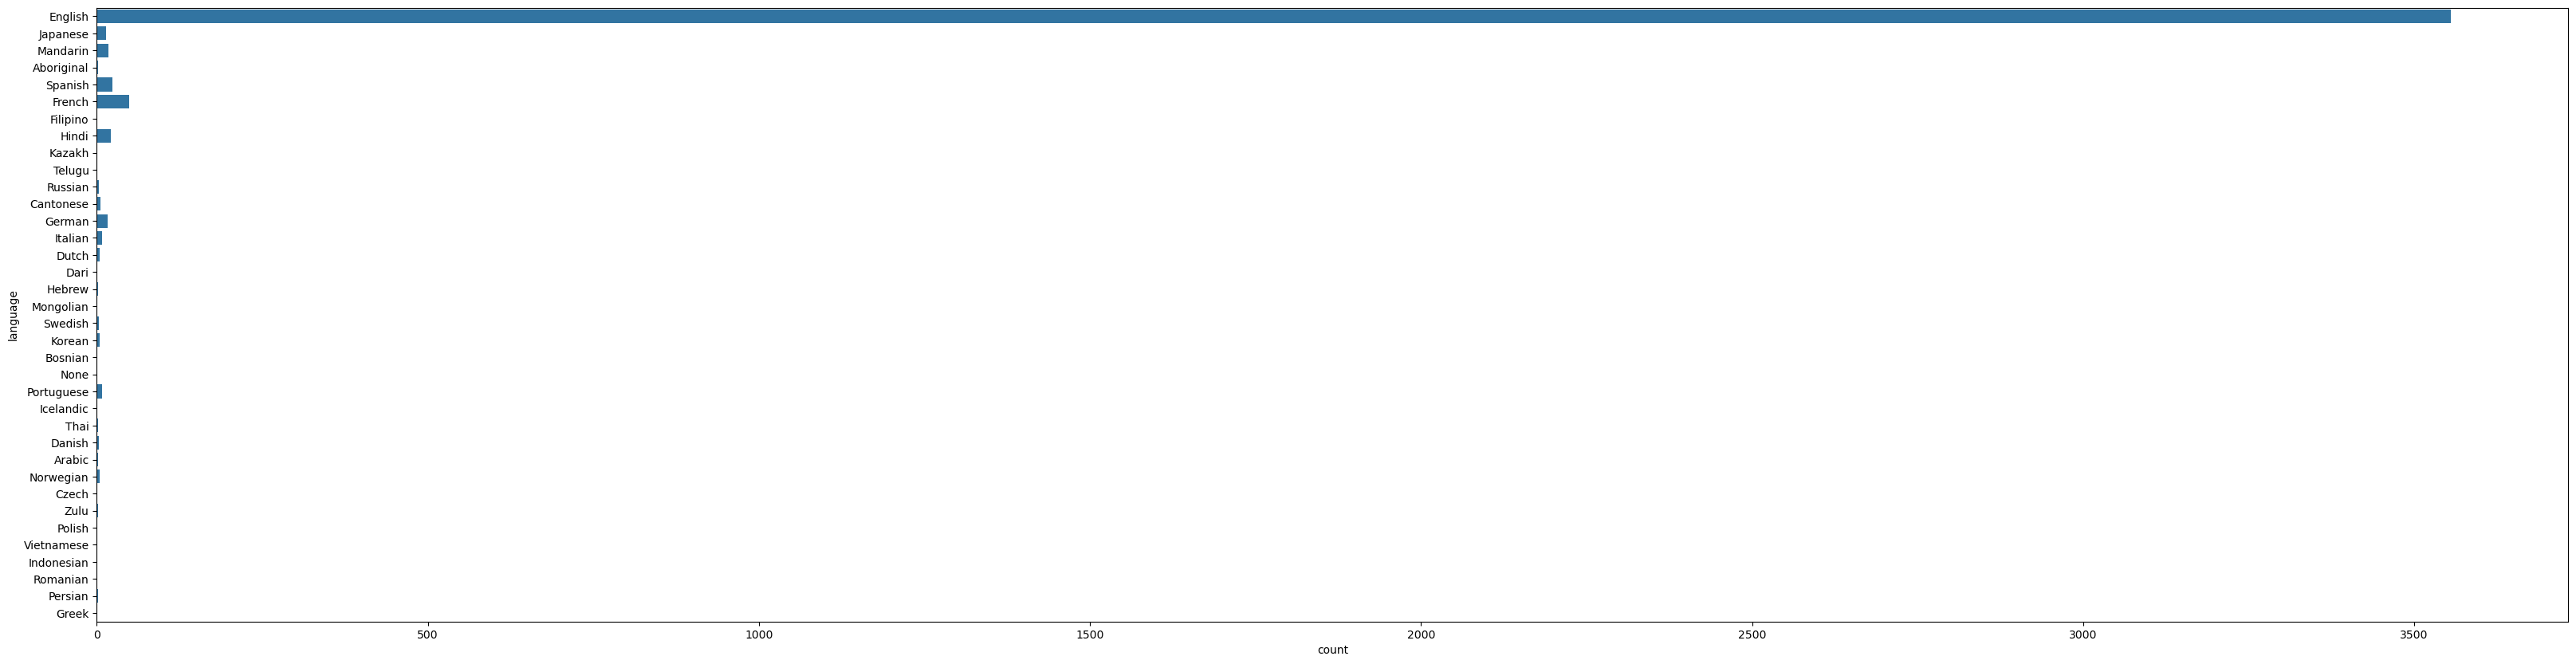

In [24]:
plt.figure(figsize=(40,10))
sns.countplot(df["language"])
plt.show()

In [25]:
# quasi tous les films sont en anglais, on retire la colonne
df.drop('language',axis = 1,inplace = True)

In [26]:
# Drop des variables textuelles
df.drop(columns=['director_name','actor_1_name','actor_2_name', 'actor_3_name', 'plot_keywords','genres'],inplace=True)

<Axes: >

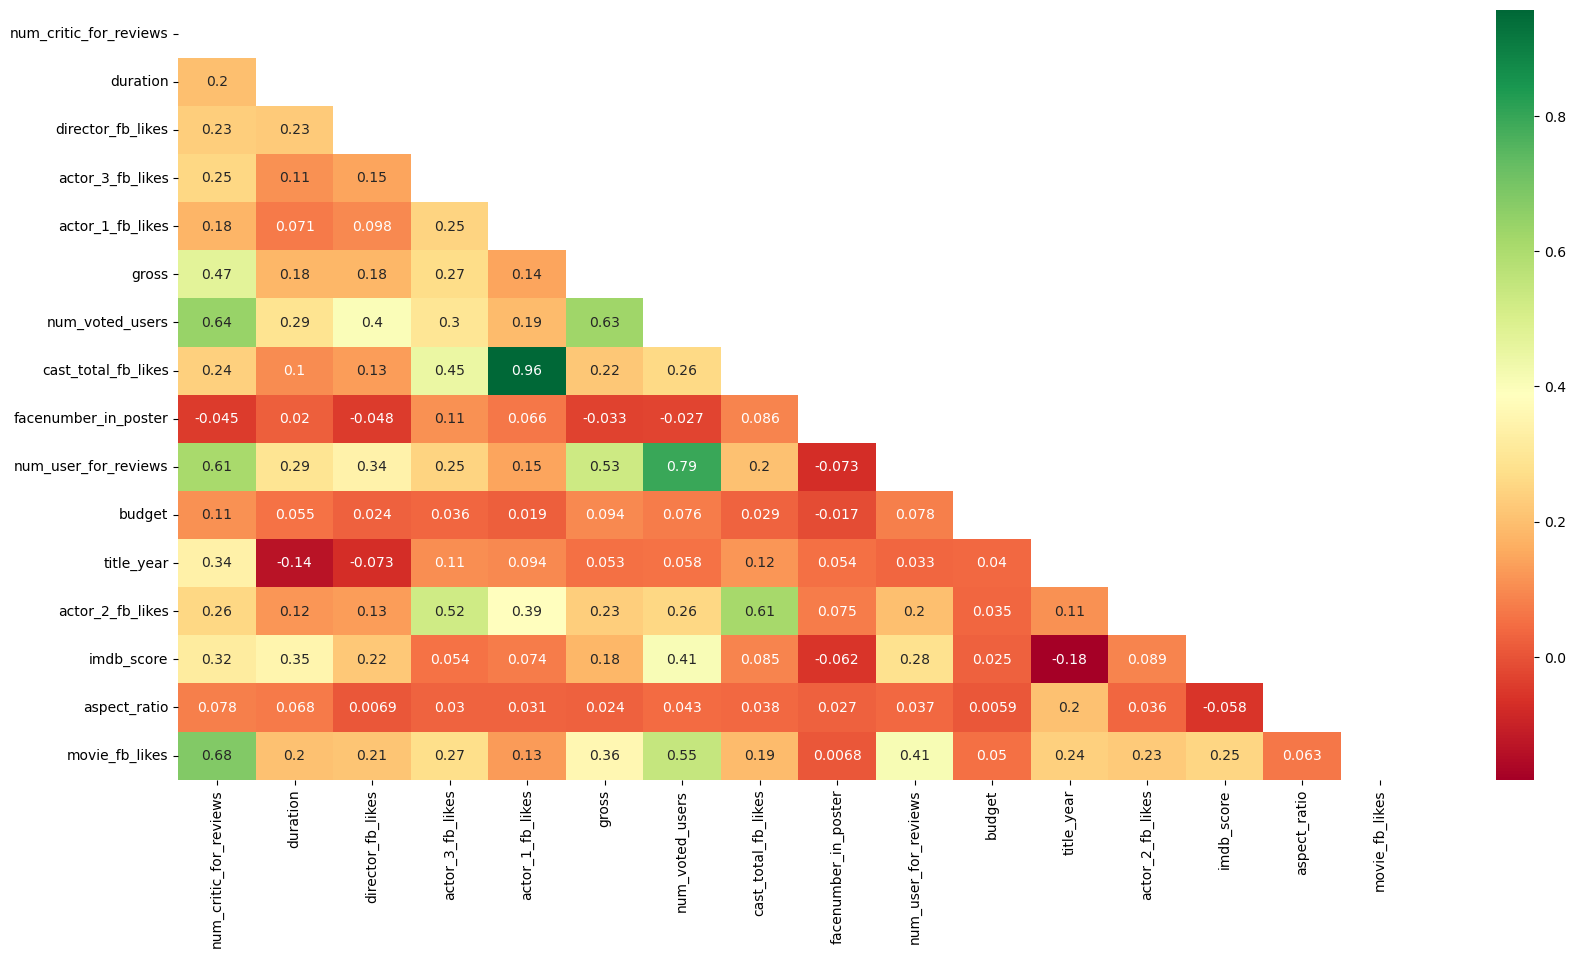

In [27]:
# Correlation
corr = df.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [28]:
# regroupe les likes des acteurs 2 et 3 en 'Other actor'
df['Other_actor_fb_likes']= df["actor_2_fb_likes"] + df['actor_3_fb_likes']

In [29]:
df.drop(columns=['actor_2_fb_likes','actor_3_fb_likes','cast_total_fb_likes'],inplace=True)

In [30]:
# Ratio du num_user_for_reviews et num_critic_for_reviews.
df['critic_review_ratio'] = df['num_critic_for_reviews']/df['num_user_for_reviews']

In [31]:
# Drop de num_critic_for_review
df.drop('num_critic_for_reviews',axis=1,inplace=True)
df.drop('num_user_for_reviews',axis=1,inplace=True)

<Axes: >

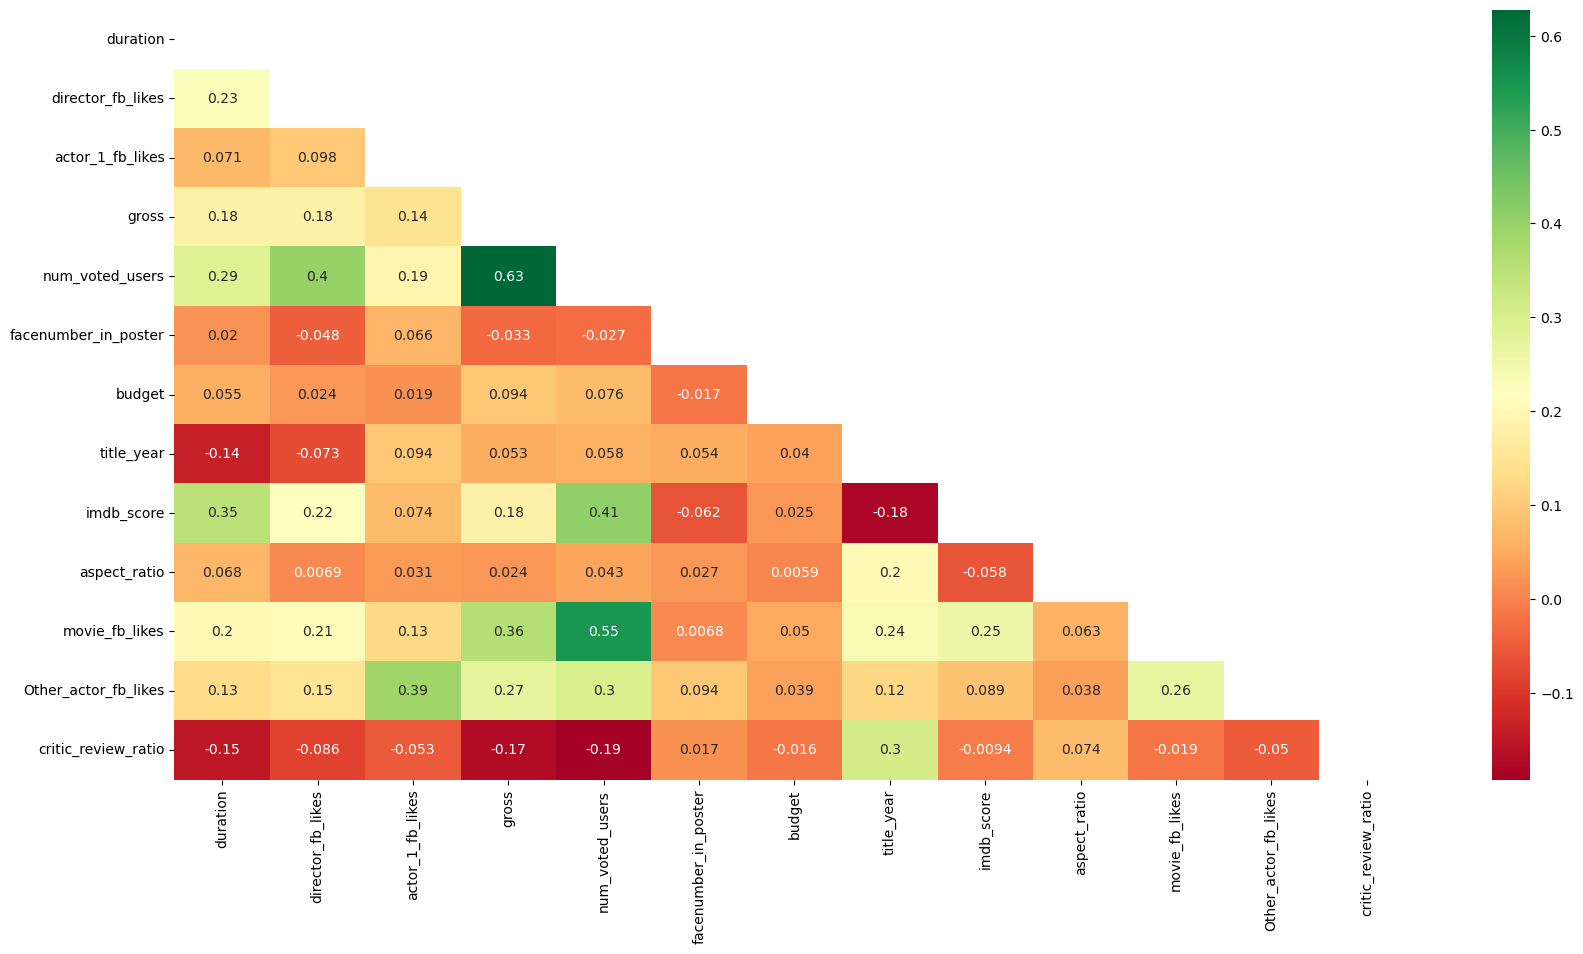

In [32]:
# Correlation
corr = df.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [33]:
# catégoriser en fonction des quartiles
df["imdb_binned_score"] = pd.qcut(df['imdb_score'], q=4, labels=False) + 1

In [34]:
# distribution Ok
df["imdb_binned_score"].value_counts()

1    1016
2     957
4     901
3     891
Name: imdb_binned_score, dtype: int64

In [35]:
# afficher les bornes des quartiles
statistiques = df['imdb_score'].describe()

quartiles = statistiques[['25%', '50%', '75%']]

print("Quartiles des valeurs d'imdb_score:")
print(quartiles)

Quartiles des valeurs d'imdb_score:
25%    5.8
50%    6.5
75%    7.1
Name: imdb_score, dtype: float64


In [36]:
# drop du score car identique à nos catégories
df.drop('imdb_score',axis=1,inplace=True)

In [37]:
value_counts=df["country"].value_counts()
print(value_counts)

USA               2882
UK                 338
France             109
Canada              92
Germany             81
Australia           41
Spain               25
India               21
China               19
Japan               17
Italy               16
Hong Kong           10
Ireland              9
South Korea          8
Brazil               8
New Zealand          7
Denmark              7
Norway               6
Mexico               6
South Africa         6
Netherlands          5
Russia               4
Thailand             3
Sweden               3
Argentina            3
West Germany         3
Czech Republic       3
Romania              2
Iran                 2
Poland               2
Belgium              2
Iceland              2
Switzerland          2
Greece               2
Official site        1
Nigeria              1
Israel               1
Colombia             1
Hungary              1
Bahamas              1
New Line             1
Finland              1
Turkey               1
Cambodia   

In [38]:
# top 2 values pour réduire les catégories
vals = value_counts[:2].index
print (vals)
df['country'] = df.country.where(df.country.isin(vals), 'other')
df["country"].value_counts()

Index(['USA', 'UK'], dtype='object')


USA      2882
other     545
UK        338
Name: country, dtype: int64

In [39]:
# on transforme les variables catégorielles
df = pd.get_dummies(data = df, columns = ['country'] , prefix = ['country'] , drop_first = True)
df = pd.get_dummies(data = df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

In [40]:
df.columns

Index(['duration', 'director_fb_likes', 'actor_1_fb_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'budget', 'title_year',
       'aspect_ratio', 'movie_fb_likes', 'Other_actor_fb_likes',
       'critic_review_ratio', 'imdb_binned_score', 'country_USA',
       'country_other', 'content_rating_NC-17', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R', 'content_rating_TV-G',
       'content_rating_TV-PG', 'content_rating_UR'],
      dtype='object')

In [41]:
# Convertir toutes les colonnes en type de données float
df = df.astype(float)

# Vérifier le résultat
print(df.dtypes)

duration                float64
director_fb_likes       float64
actor_1_fb_likes        float64
gross                   float64
num_voted_users         float64
facenumber_in_poster    float64
budget                  float64
title_year              float64
aspect_ratio            float64
movie_fb_likes          float64
Other_actor_fb_likes    float64
critic_review_ratio     float64
imdb_binned_score       float64
country_USA             float64
country_other           float64
content_rating_NC-17    float64
content_rating_PG       float64
content_rating_PG-13    float64
content_rating_R        float64
content_rating_TV-G     float64
content_rating_TV-PG    float64
content_rating_UR       float64
dtype: object


#### MODEL

In [42]:
X=pd.DataFrame(columns=['duration', 'director_fb_likes', 'actor_1_fb_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'budget', 'title_year',
       'aspect_ratio', 'movie_fb_likes', 'Other_actor_fb_likes',
       'critic_review_ratio', 'country_USA',
       'country_other', 'content_rating_NC-17', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R', 'content_rating_TV-G',
       'content_rating_TV-PG', 'content_rating_UR'],
                        data=df)
y=pd.DataFrame(columns=['imdb_binned_score'],data=df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [43]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [44]:
# Random Forest
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

[[199  74  23   6]
 [ 89 118  56  19]
 [ 30  91  97  56]
 [ 25  31  49 167]]
Accuracy: 0.5141592920353982


#### pour trouver les meilleurs hyperparametres:

In [45]:
# from sklearn.metrics import make_scorer, r2_score
# from sklearn.ensemble import RandomForestRegressor
# # to create a RandomForestRegressor
# rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# # to create R2 scorer for GridSearchCV
# r2_scorer = make_scorer(r2_score)

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # We define the parameter distributions to search
# param_dist = {
#     'n_estimators': randint(50, 1000),
#     'max_depth': [None, 10, 20],
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 5),
#     'max_features': ['sqrt', 'log2']
# }

# # we perform randomized search
# random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, scoring=r2_scorer, cv=5, n_iter=10, n_jobs=-1)
# random_search.fit(X_train, y_train)

# # to get the best hyperparameters
# best_params_random = random_search.best_params_

# # we print the best hyperparameters
# print("Best Hyperparameters (RandomizedSearchCV):", best_params_random)

c:\Users\lacom\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters (RandomizedSearchCV): {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 333}


In [46]:
# Random Forest with best estimator
rfc = RandomForestClassifier(max_depth= 20, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 7, n_estimators= 333)
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

[[205  71  19   7]
 [ 86 119  58  19]
 [ 36  86  89  63]
 [ 22  28  46 176]]
Accuracy: 0.5212389380530974


#### MAE

In [47]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,rfcpred))

MAE 0.620353982300885


#### R²

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,rfcpred)
print(r2)

0.2445962489715401


In [49]:
n=df.shape[0]
k=df.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.24015507245560574


#### pour appeler le modele dans l'appli:

In [50]:
import pickle

pickle.dump(rfc, open('model.pkl','wb'))

"\n#Loading model to compare the results\nmodel = pickle.load(open('model.pkl','rb'))\nprint(model.predict([[2.6, 8, 10.1]]))\n"

#### afficher les min max pour donner une fourchette/ordre d'idée dans le formulaire

In [53]:
min_max_values = df.describe().loc[['min', 'max']]
pd.set_option('display.max_columns', None)
print(min_max_values)

     duration  director_fb_likes  actor_1_fb_likes        gross  \
min      25.0                2.0               6.0        162.0   
max     330.0            23000.0          640000.0  652177271.0   

     num_voted_users  facenumber_in_poster        budget  title_year  \
min             37.0                   0.0  1.100000e+03      1927.0   
max        1676169.0                  43.0  1.221550e+10      2016.0   

     aspect_ratio  movie_fb_likes  Other_actor_fb_likes  critic_review_ratio  \
min           1.2             7.0                   5.0             0.037037   
max          16.0        349000.0              137748.0            21.000000   

     imdb_binned_score  country_USA  country_other  content_rating_NC-17  \
min                1.0          0.0            0.0                   0.0   
max                4.0          1.0            1.0                   1.0   

     content_rating_PG  content_rating_PG-13  content_rating_R  \
min                0.0                   0.0 

### Résultat de l'app en local

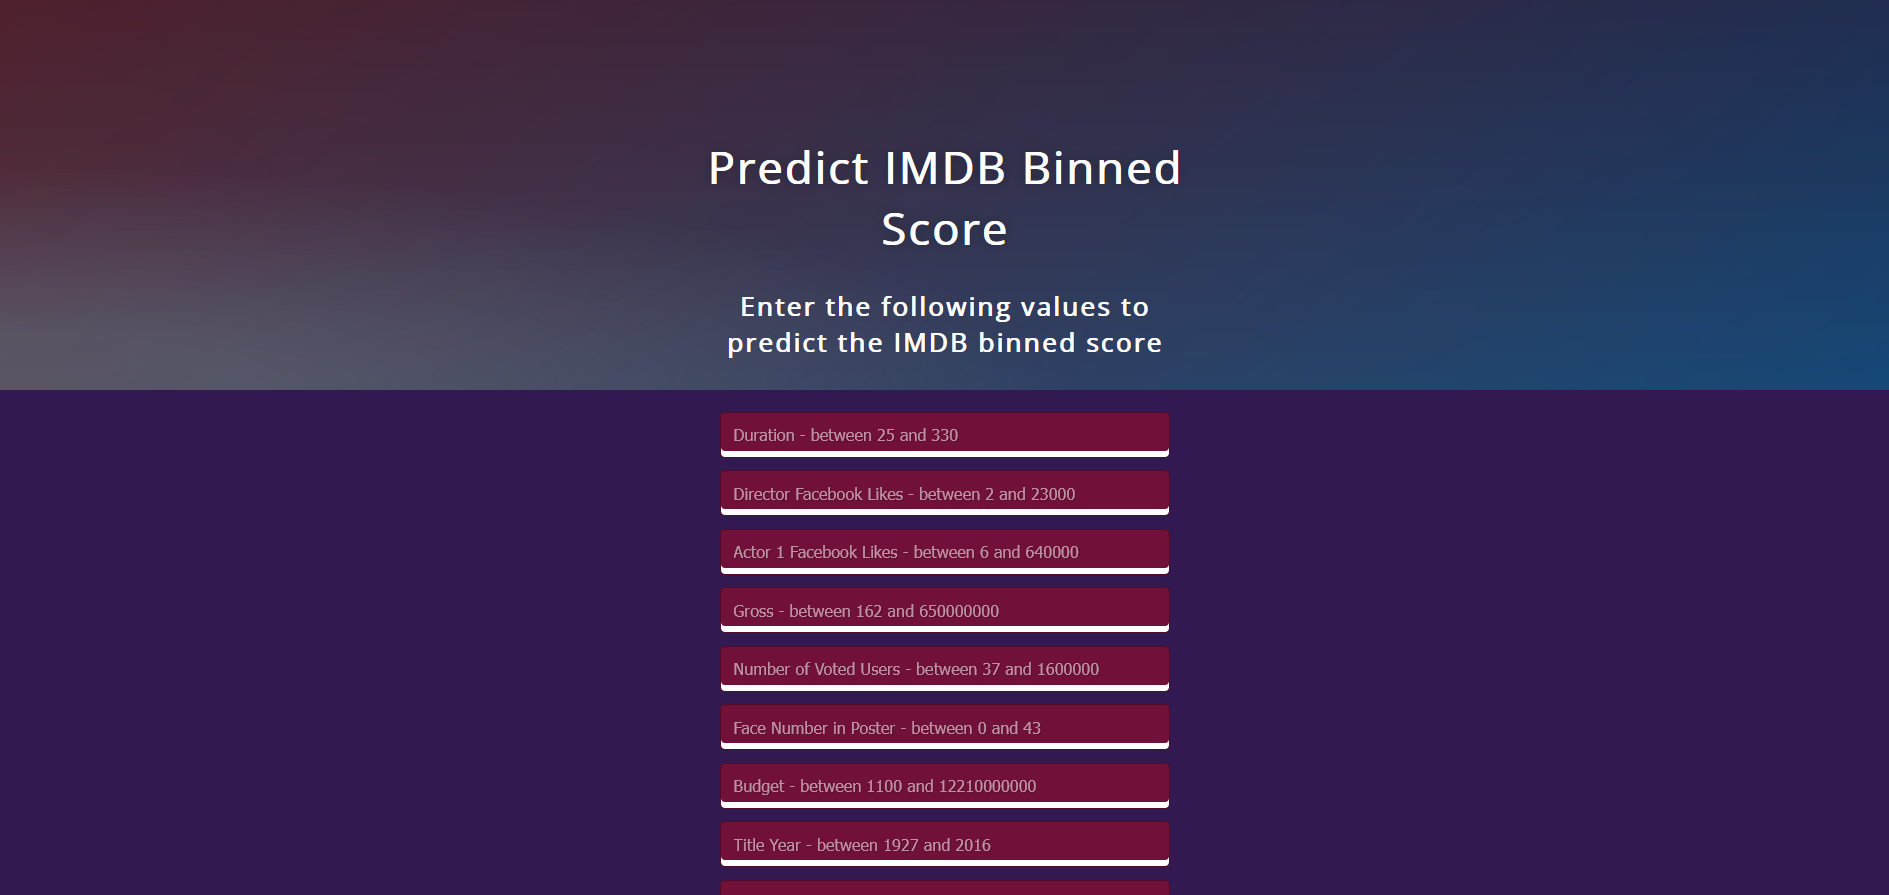

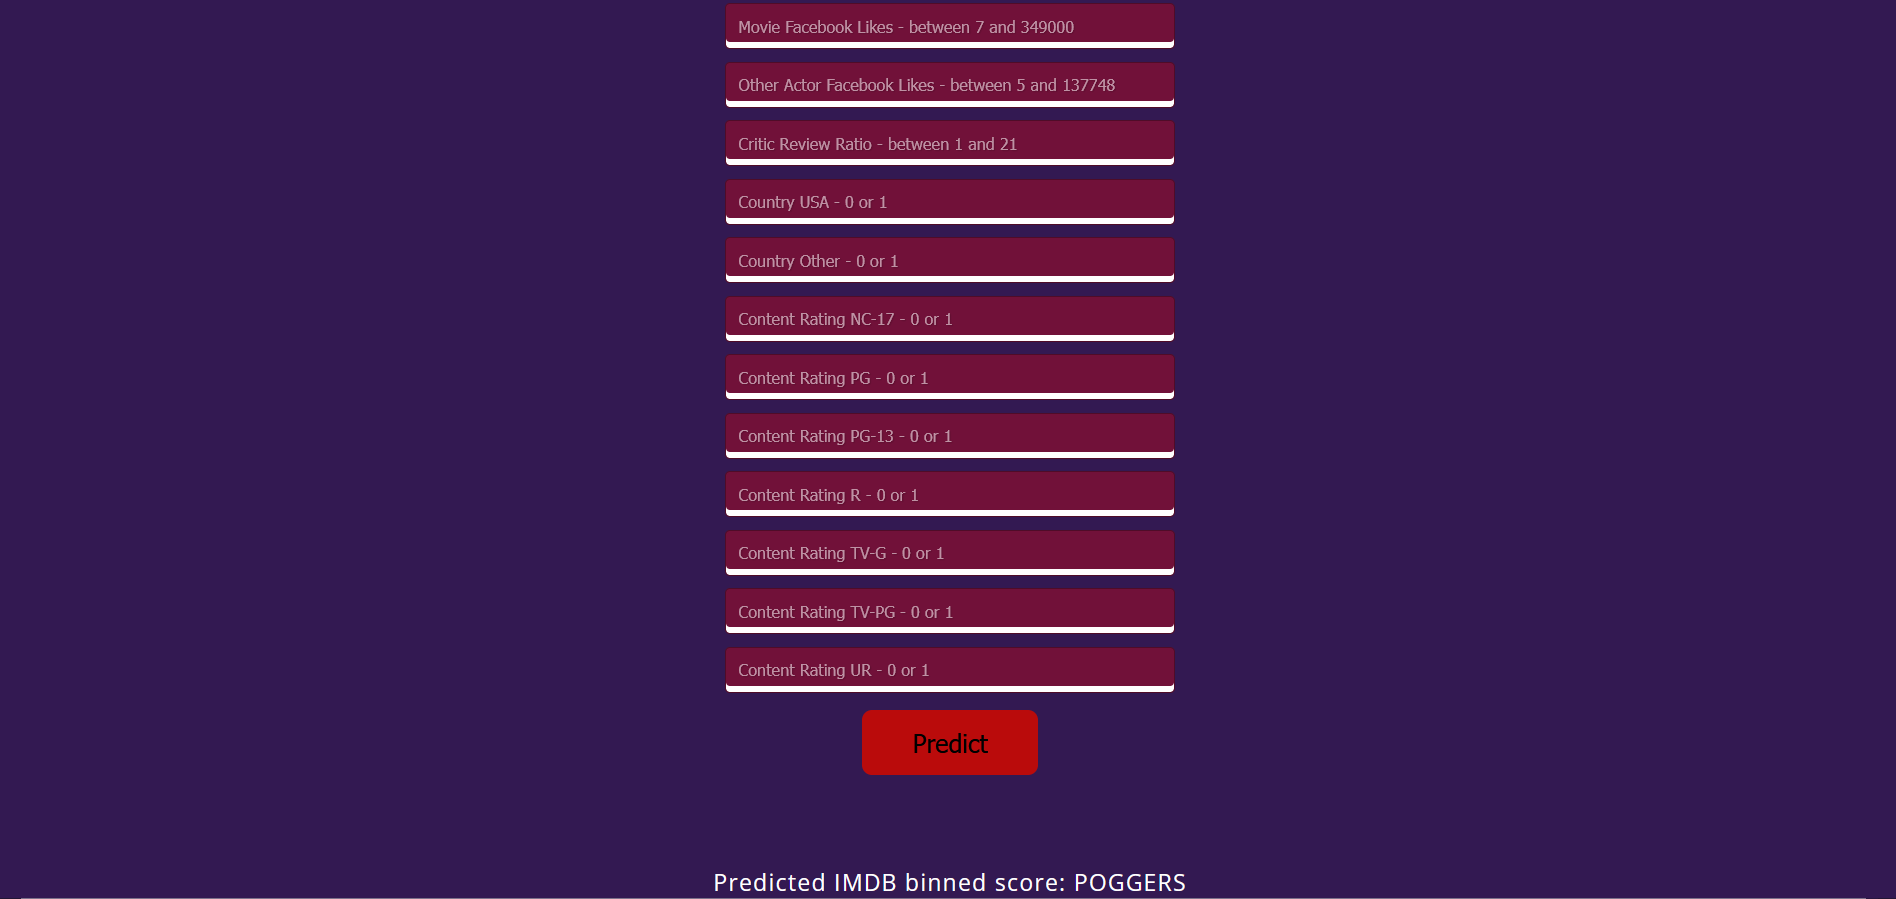

### La requête API fonctionne

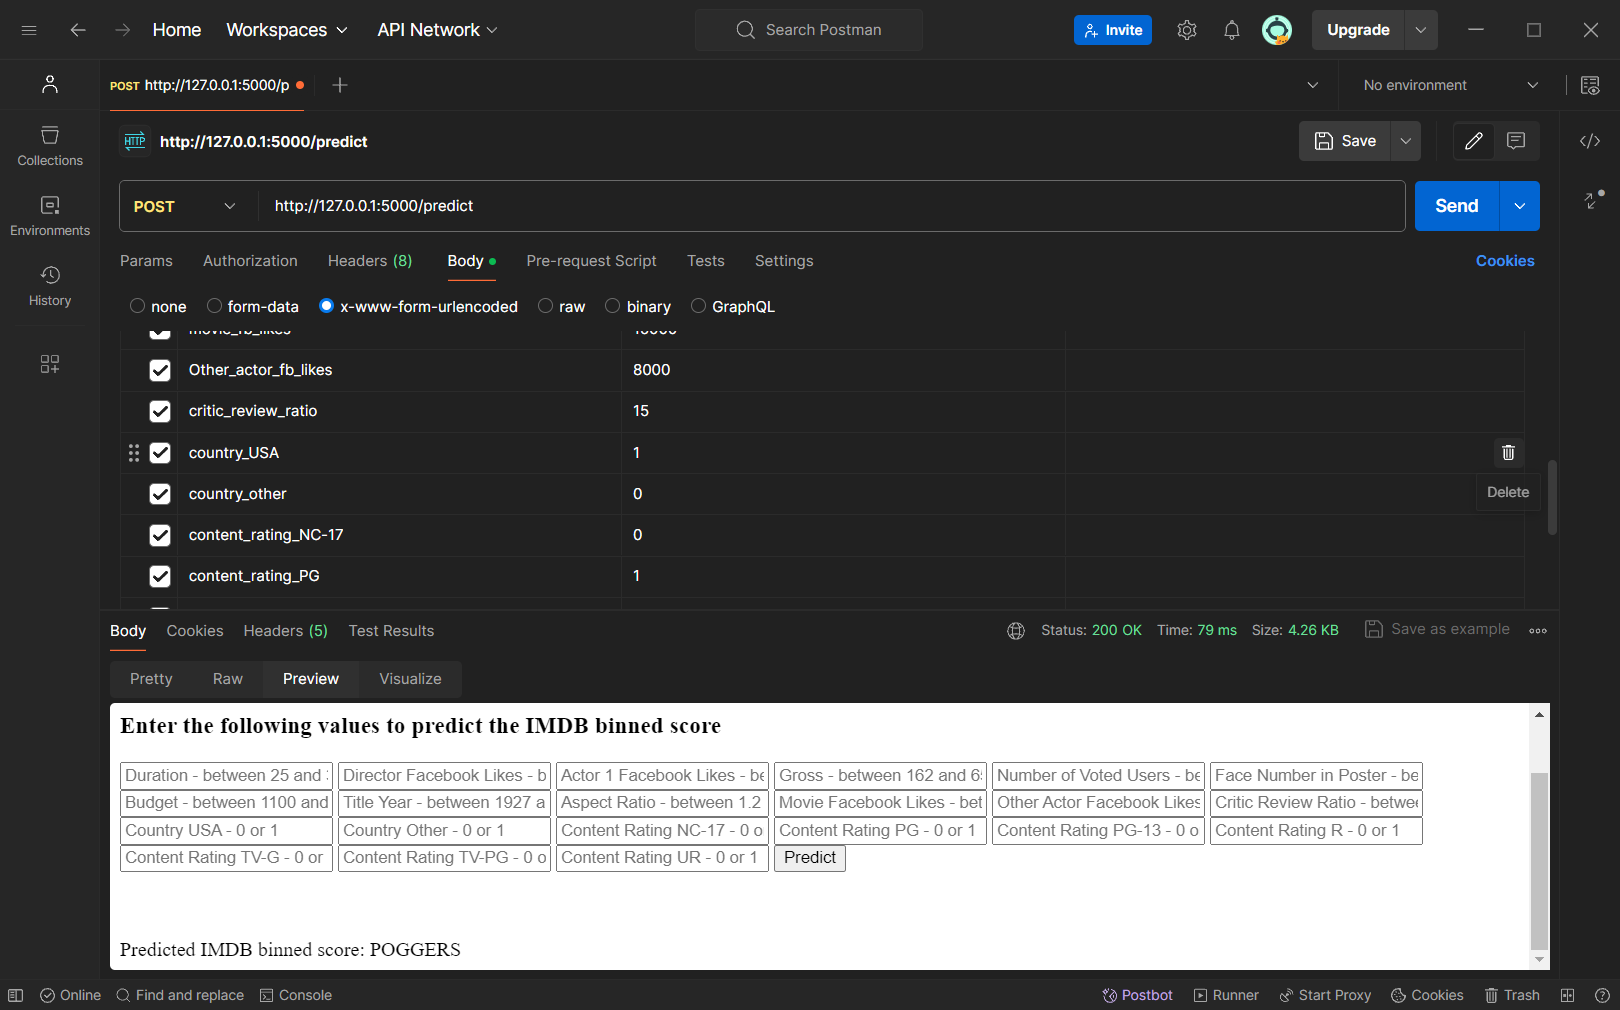